In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [138]:
gold_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gold Price Prediction/gld_price_data.csv')

In [139]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [140]:
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [141]:
gold_price.shape

(2290, 6)

In [142]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [143]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [144]:
gold_price.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


<Axes: >

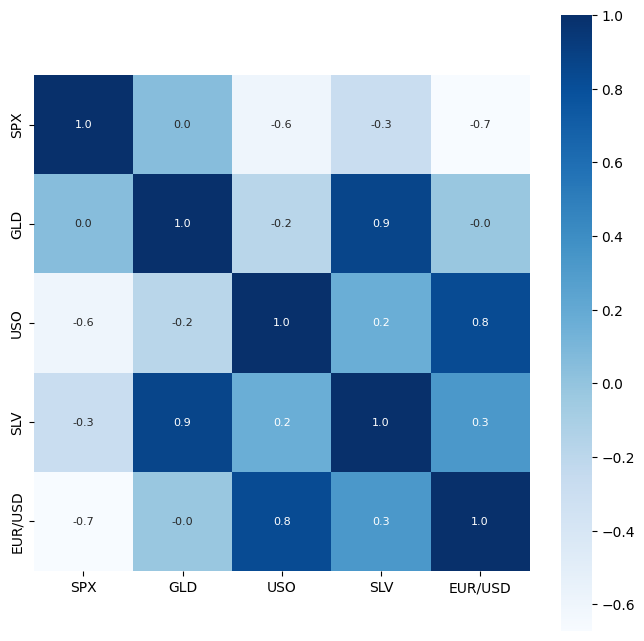

In [145]:
correlation = gold_price.drop(columns =['Date']).corr()

# Constructiong heat map to understand correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, square = True,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='Blues')

In [161]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [146]:
# Date feature is stored as object in the data frame. To increase the speed of calculations, we convert it's data type to datetime and then sort this feature in ascending order:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])
gold_price.sort_values(by='Date', ascending=True, inplace=True)
gold_price.reset_index(drop=True, inplace=True)

In [147]:
# The " , " sign is redundant in the dataset. First, we remove it from the entire dataset and then change the data type of the numerical variables to float:
NumCols = gold_price.columns.drop(['Date'])
gold_price[NumCols] = gold_price[NumCols].replace({',': ''}, regex=True)
gold_price[NumCols] = gold_price[NumCols].astype('float64')

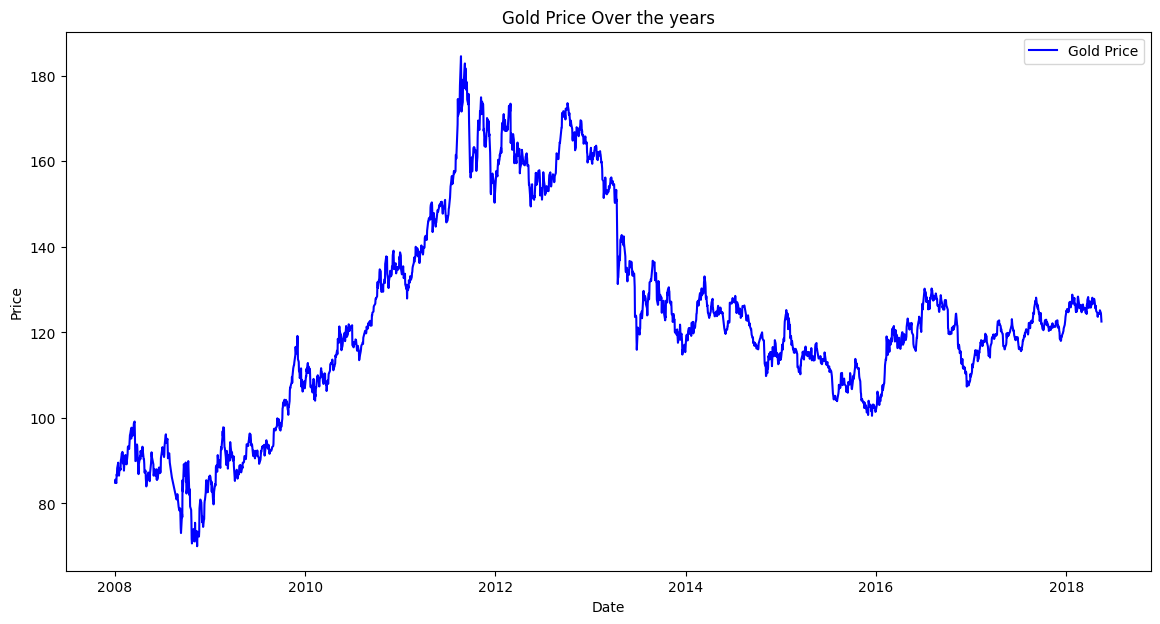

In [148]:
plt.figure(figsize=(14, 7))
plt.plot(gold_price['Date'], gold_price['GLD'], color='blue', label='Gold Price')
plt.title('Gold Price Over the years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-149-f18175ed03d6>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GLD', ylabel='Density'>

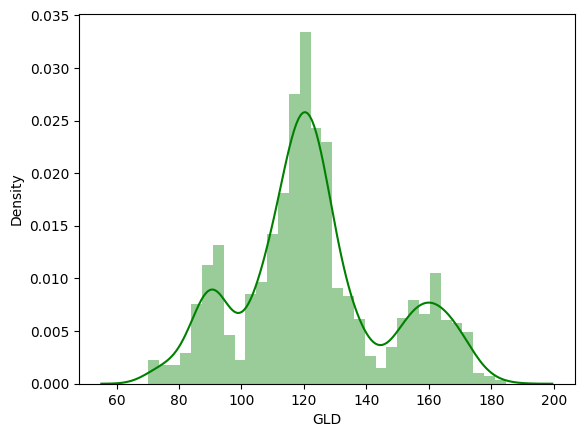

In [149]:
# Checking distribution of the GLD price
sns.distplot(gold_price['GLD'],color='green')

In [156]:
# Splitting features and target
X = gold_price.drop(columns=['GLD','Date'],axis=1)
Y = gold_price['GLD']

In [157]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [158]:
# Splitting into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [162]:
model = RandomForestRegressor(n_estimators = 100)

In [164]:
# Training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [168]:
# Model evaluation on training data
training_data_prediction = model.predict(X_train)

In [169]:
# Model Evaluation on training data
error_score = r2_score(Y_train, training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9984077339167577


In [165]:
# Model evaluation on test data
test_data_prediction = model.predict(X_test)

In [167]:
# R squared error
error_score = r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9894012840049041


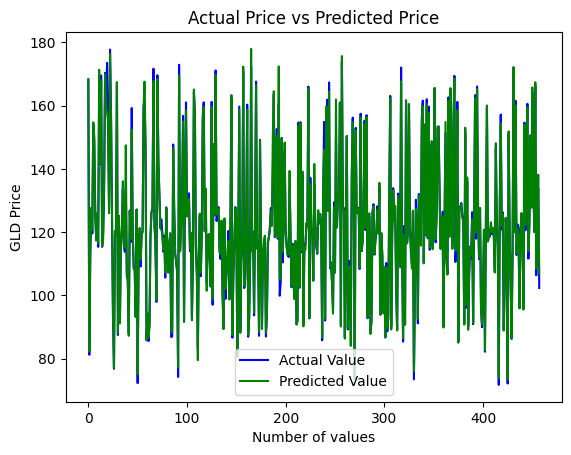

In [173]:
# Comparing Actual V/s Predicted Values
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()